## IDIS3802 - Data science with Python
### Final Project - Impact of alcohol consumption on student's grades
#### Submitted by - Ameya Ghatpande (W1185595)

In [245]:
# <aghatpande> on 07-Mar-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

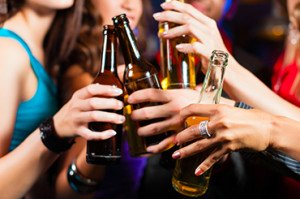

In [246]:
from IPython.display import Image
Image(filename='C:\MSIS-Data science with Python\Lectures and python files\Final-Project-Important\Data\\alcohol-consumption.jpg')

In [247]:
# <aghatpande> on 07-Mar-2017
# import all the necessary libraries here
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## This project will proceed in following sub parts
- Explain the data (Name and corresponding meaning of few columns, size and source of data)
- Data preparation and exploration phase (Data cleaning, renaming few columns, basic Graphs for understanding data better)
- Analyze impact of Alcohol consumption on grades (Machine learning - OLS)
- Which Factor really impact the student grades (Machine learning - DecisionTreeRegressor)
- Teacher actions which can result in better grades
- Some cool graphs

## Data source and my inspiration of choosing this dataset
- Found this dataset on Kaggle.com (https://www.kaggle.com/uciml/student-alcohol-consumption)
- I liked this data because of following reasons
    - Large number of columns (like students alcohol consumption daily and weekly, family education status, parents marital status, extra curricular activities of students, romantic involment of students and Grades)
    - Alcohol consumption is a generally a problem among many students, and if I can find a coorelation between alcohol consumption and student grades, then corrective actions can be taken by Parents and school authorities
    - Large number of columns (31 in total). So I can find more insights
    
# Data explanation
- Each row of this dataset gives information about a student(in total 32 columns). Some of the important columns are -  
- Student Information contains columns like 
    - Weekday Alcohol consumption (Numeric - 1 being lowest and 5 being highest)
    - Weekend Alcohol consumption (Numeric - 1 being lowest and 5 being highest)
    - Final Grades (Numeric - 0 being lowest and 20 being highest)
    - Failures in the past (Numeric - 1 being lowest and 5 being highest)
    - HigherEducation - wants to take higher education (binary: yes or no)
    - AbsentInPast - Number of times the student is absent in the class
    - Internet access at home (binary: yes or no)
    - Romantic - with a romantic relationship (binary: yes or no)
    - Paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    - Activities - extra-curricular activities (binary: yes or no)
    - Freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    - Sex - student's sex (binary: 'F' - female or 'M' - male)
    - Age - student's age (numeric: from 15 to 22)
    - Address - student's home address type (binary: 'U' - urban or 'R' - rural)
- Family information about student contains columns like
    - Mother's education level (Numeric - 0 being lowest and 5 being highest)
    - Father's education level (Numeric - 0 being lowest and 5 being highest)
    - Mother's job level (String like "teacher", "civil services", "at_home", "other")
    - Father's job level (String like "teacher", "civil services", "at_home", "other")
    - Parent's cohabitation status (String: 'T' - living together or 'A' - apart)
    - Guardian - student's guardian (String: 'mother', 'father' or 'other')
    - Traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 ->1 hour)
    - Studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    - Family educational support (binary: yes or no)
    - Family size - (String: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    
- Information is present from 2 schools ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

# Data cleaning and data preparation
- Data is present in form of 2 CSV files (One is Math score and other is portugese language score). I will merge the 2 files
- Need to remove the duplicates. Since there is no unique ID(index) in the original data, I am consdering rows to have same values of multiple columns to be duplicate (columns like address, age, family size, Mothers and Father's education etc). Only drawback is I will be removing "twins" of same "gender" if any. (But there is no way to find out that)
- Rename the columns to make them user readable and easily understandable

In [369]:
studentsMath = pd.read_csv('C:\MSIS-Data science with Python\Lectures and python files\Final-Project-Important\Data\student-maths.csv')
studentsPortugese = pd.read_csv('C:\MSIS-Data science with Python\Lectures and python files\Final-Project-Important\Data\student-portugese.csv')

students = [studentsMath,studentsPortugese]
students = pd.concat(students)

print("Size of data before removing the duplicates", students.shape)
students=students.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
print("Size of data after removing the duplicates", students.shape)

# <aghatpande> on 13-Mar-2017
# Renaming the columns to user friendly names
print("\nColumn names in the original data")
students.columns
print("Column names after renaming to user friendly names")
students.columns = ["WeekdayAlcohol", "FathersEducation", "FathersJob", "FinalGrades", "MothersEducation", "MothersJob", "ParentalStatus", "WeekendAlcohol", "AbsencesInPast", "ExtraActivities", "Address", "Age", "FailuresInPast", "FamilyRelationship", "FamilySize", "FamilyEducationSupport", "Freetime", "GoingOut", "Guardian", "Health", "HigherEducation", "Internet", "Nursery", "PaidTuition", "Reason", "Romantic", "school", "schoolup", "Sex", "Studytime", "Traveltime"]
students.columns

('Size of data before removing the duplicates', (1044, 31))
('Size of data after removing the duplicates', (806, 31))

Column names in the original data


Index([u'Dalc', u'Fedu', u'Fjob', u'G1', u'Medu', u'Mjob', u'Pstatus', u'Walc',
       u'absences', u'activities', u'address', u'age', u'failures', u'famrel',
       u'famsize', u'famsup', u'freetime', u'goout', u'guardian', u'health',
       u'higher', u'internet', u'nursery', u'paid', u'reason', u'romantic',
       u'school', u'schoolsup', u'sex', u'studytime', u'traveltime'],
      dtype='object')

Column names after renaming to user friendly names


Index([u'WeekdayAlcohol', u'FathersEducation', u'FathersJob', u'FinalGrades',
       u'MothersEducation', u'MothersJob', u'ParentalStatus',
       u'WeekendAlcohol', u'AbsencesInPast', u'ExtraActivities', u'Address',
       u'Age', u'FailuresInPast', u'FamilyRelationship', u'FamilySize',
       u'FamilyEducationSupport', u'Freetime', u'GoingOut', u'Guardian',
       u'Health', u'HigherEducation', u'Internet', u'Nursery', u'PaidTuition',
       u'Reason', u'Romantic', u'school', u'schoolup', u'Sex', u'Studytime',
       u'Traveltime'],
      dtype='object')

<b> Check if any columns has values as NULL. In this case, no columns have any Nulls</b>

In [370]:
students[students.isnull() == True].count()

WeekdayAlcohol            0
FathersEducation          0
FathersJob                0
FinalGrades               0
MothersEducation          0
MothersJob                0
ParentalStatus            0
WeekendAlcohol            0
AbsencesInPast            0
ExtraActivities           0
Address                   0
Age                       0
FailuresInPast            0
FamilyRelationship        0
FamilySize                0
FamilyEducationSupport    0
Freetime                  0
GoingOut                  0
Guardian                  0
Health                    0
HigherEducation           0
Internet                  0
Nursery                   0
PaidTuition               0
Reason                    0
Romantic                  0
school                    0
schoolup                  0
Sex                       0
Studytime                 0
Traveltime                0
dtype: int64

# Exploratory Data Analysis (EDA)

<b>1. Lets find the proportion of girls and boys in the data</b>

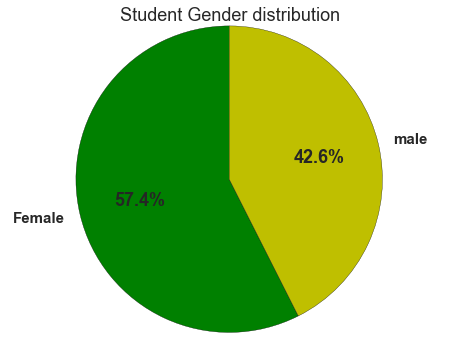

In [371]:
fig1, ax1 = plt.subplots()
plt.title("Student Gender distribution");
plt.pie(students["Sex"].value_counts().tolist(), colors=["g", "y"], labels=["Female", "male"], startangle=90, autopct='%.1f%%', textprops={'weight': 'bold'});
ax1.axis('equal');

<b> 2. Lets find age wise distribution of girls and boys in the class. Since the Y-axis (number of students) is shared, it can be seen that girls are more than boys in all age groups</b>

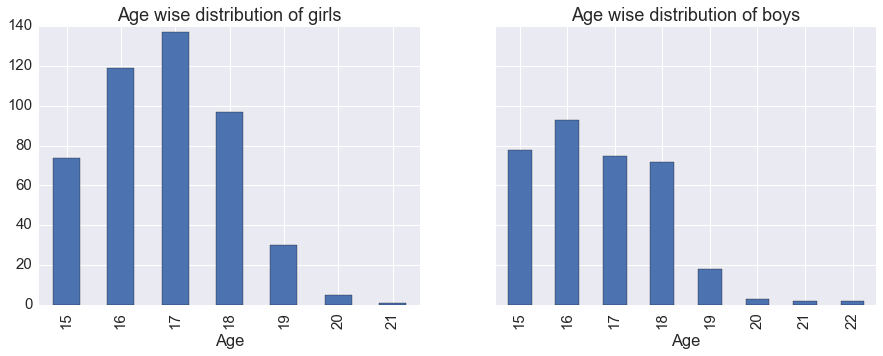

In [372]:
fig, ax = plt.subplots(1, 2, sharey=True);
students[students["Sex"] == "F"].groupby("Age").size().plot(ax = ax[0], kind='bar', title='Age wise distribution of girls', figsize=(15,5));
students[students["Sex"] == "M"].groupby("Age").size().plot(ax = ax[1], kind='bar', title='Age wise distribution of boys', figsize=(15,5));

<b> 3. We have students both from urban and rural areas. Lets check the weekday and weekend alcohol consumption in these areas.
By keeping the  "Y axis" common, we can directly compare the two graphs. It can be clearly seen that alcohol consumption among urban students is more than rural students</b>

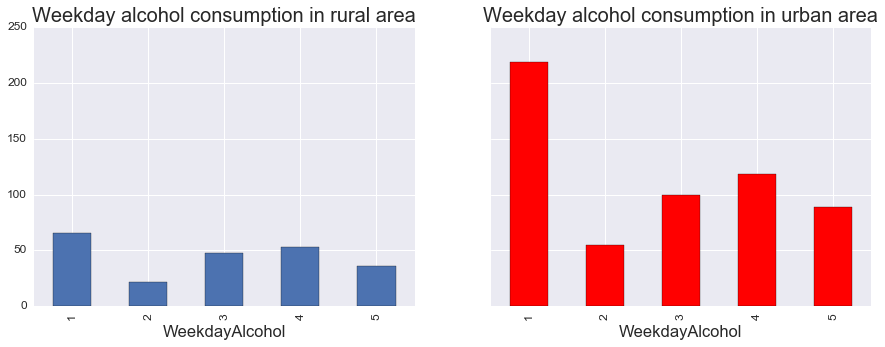

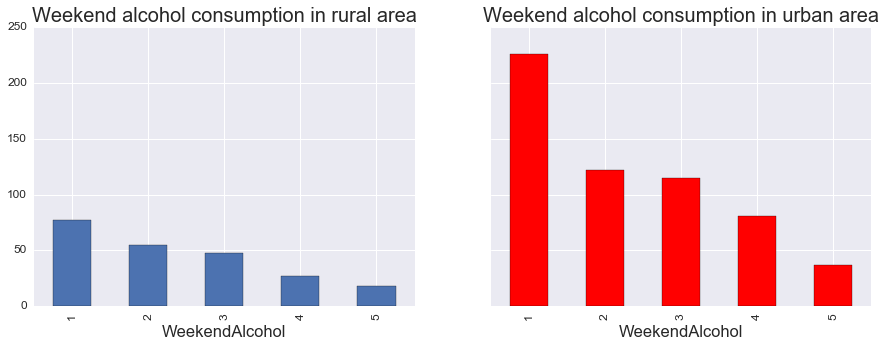

In [352]:
rural = students[students['Address'] == 'R']
urban = students[students['Address'] == 'U']

# Daily alcohol consumption in rural and urban areas
fig, ax = plt.subplots(1, 2, sharey=True)
rural.groupby("WeekdayAlcohol").size().plot(kind='bar', ax=ax[0], title='Weekday alcohol consumption in rural area', figsize=(15,5), fontsize=12);
urban.groupby('WeekdayAlcohol').size().plot(kind='bar', ax=ax[1], title='Weekday alcohol consumption in urban area', figsize=(15,5), color="r", fontsize=12);
ax[0].title.set_size(20);
ax[1].title.set_size(20);

# Weekly alcohol consumption in rural and urban areas
fig, ax1 = plt.subplots(1, 2, sharey=True)
rural.groupby("WeekendAlcohol").size().plot(kind='bar', ax=ax1[0], title='Weekend alcohol consumption in rural area', figsize=(15,5), fontsize=12);
urban.groupby('WeekendAlcohol').size().plot(kind='bar', ax=ax1[1], title='Weekend alcohol consumption in urban area', color="r", figsize=(15,5), fontsize=12);
ax1[0].title.set_size(20);
ax1[1].title.set_size(20);

# Insights from the data
- Insight 1 - High weekday alcohol consumption impacts the grades badly
- <b>Surprise</b> - Mother's education can play an important role in a student getting decent grades. Highly educated Mom's children get better grades in tests as compared to those whose Mom's are less educated

In [374]:
# <aghatpande> on 13-Mar-2017
# Intent is to find the FinalGrades, so y=FinalGrades
# We are not sure what factors plays the most important role in FinalGrades, so X = will be all other columns.
y = students["FinalGrades"]
X = students.drop(["FinalGrades"], axis=1)

In [375]:
# <aghatpande> on 13-Mar-2017
# Convert the String columns to dummy variables in order to run the regressor
X = pd.get_dummies(X)

In [377]:
# <aghatpande> on 13-Mar-2017
# Find the feature_importances and sort it with highest values. These are the most important features for our analysis
tree = DecisionTreeRegressor()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

1. Feature MothersEducation (0.427129)
2. Feature WeekdayAlcohol (0.152758)
3. Feature FailuresInPast (0.054463)
4. Feature Health (0.042504)
5. Feature HigherEducation_yes (0.025237)
6. Feature GoingOut (0.020875)
7. Feature AbsencesInPast (0.018194)
8. Feature Traveltime (0.017213)
9. Feature Freetime (0.013939)
10. Feature Studytime (0.013861)
11. Feature FathersEducation (0.013847)
12. Feature FamilyRelationship (0.012518)
13. Feature WeekendAlcohol (0.011504)
14. Feature PaidTuition_yes (0.009868)
15. Feature school_MS (0.009511)
16. Feature Age (0.009456)
17. Feature Reason_reputation (0.008959)
18. Feature ExtraActivities_yes (0.008267)
19. Feature Address_U (0.008246)
20. Feature MothersJob_at_home (0.007551)
21. Feature FamilyEducationSupport_yes (0.007032)
22. Feature PaidTuition_no (0.007012)
23. Feature Romantic_yes (0.006479)
24. Feature MothersJob_other (0.006402)
25. Feature Guardian_father (0.006072)
26. Feature MothersJob_teacher (0.005531)
27. Feature HigherEducation_

In [381]:
# <aghatpande> on 13-Mar-2017
# From the above feature_importances, take only the Top 10 features.
# By using OLS, we can get the direct/Indirect impact of these features on FinalGrades
import statsmodels.formula.api as smf

ImpactOnGrades = smf.ols(formula='FinalGrades ~ MothersEducation + WeekdayAlcohol + FailuresInPast + Health + HigherEducation + GoingOut + AbsencesInPast + Traveltime + FathersEducation', data=students).fit()
print("\nCoefficients for impact of alcohol consumption \n")
ImpactOnGrades.params

#print(ImpactOnGrades.summary())


Coefficients for impact of alcohol consumption 



Intercept                 9.321955
HigherEducation[T.yes]    0.427608
MothersEducation          1.001302
WeekdayAlcohol           -0.630249
FailuresInPast           -0.988113
Health                    0.386050
GoingOut                 -0.073916
AbsencesInPast           -0.001924
Traveltime                0.096623
FathersEducation          0.029306
dtype: float64

<b> IMPORTANT OBSERVATIONS FROM above Ordinary Least Squares (OLS) </b>
- Higher the mother's education, higher are the chances of students getting good grades (Also shown in figure below)
- Higher the Weekday alcohol consumption results in lower grades (Negative sign indicates inverse relation - Figure below)
- Higher the students interest in pursuing higher education, the more serious he is about his grades (good grades)
- Healthier students have better grades
- Number of Past Failures also negatively impacts the grades
- Father's education does not impact the grades as strong as Mother's education

# Accuracy of the model

In [388]:
# <aghatpande> on 13-Mar-2017
# I am checking the accuracy of model using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

lr= LinearRegression()
X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size=0.2)

lr.fit(X_tr,y_tr)
y_pred= lr.predict(X_test)

print('mse:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test, y_pred))
lr.score(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('mse:', 3.8534686068693795)
('r2_score:', 0.52054752964893414)


0.64310504648220745

# Teacher's action to improve the grades
- Try to motivate the students and increase the <b>interest amongst students to pursue higher education</b>. Students who wants to pursue higher education automatically score good marks in tests as compared to those who do not wish to pursue higher education. This was proved above by feature_importances as well as can be seen in below bar graph

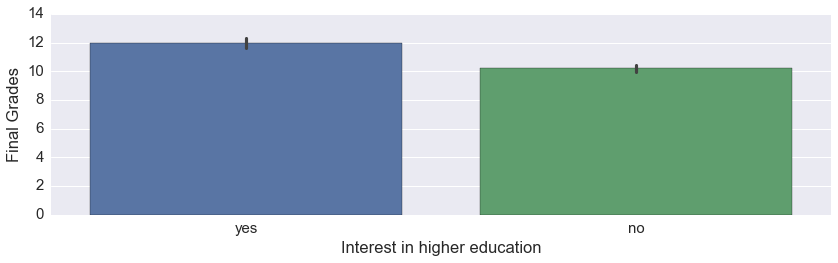

In [383]:
sns.set(font_scale=1.5)
plot2 = sns.factorplot(x="HigherEducation", y="FinalGrades", data=students, aspect =3, kind="bar");
plot2.set(ylabel="Final Grades", xlabel="Interest in higher education");

# Some cool graphs to prove our analysis

- <b>High alcohol consumption on week days has significant impact on grades. After alcohol consumption of 3 or more, students grades are almost same irrespective of Gender</b>

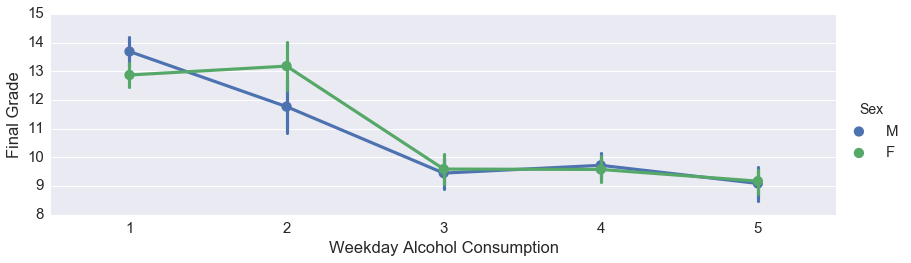

In [384]:
plot2 = sns.factorplot(x="WeekdayAlcohol", y="FinalGrades", data=students, hue="Sex", aspect =3);
plot2.set(ylabel="Final Grade", xlabel="Weekday Alcohol Consumption");

- <b>High mother's education can cause higher grades among students</b>
- <b>Even though there is no trend between Father's education and the grades of students, children of least educated fathers get good grades </b>

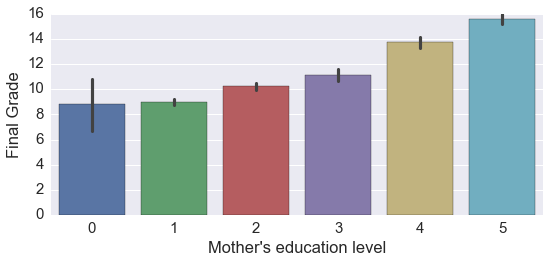

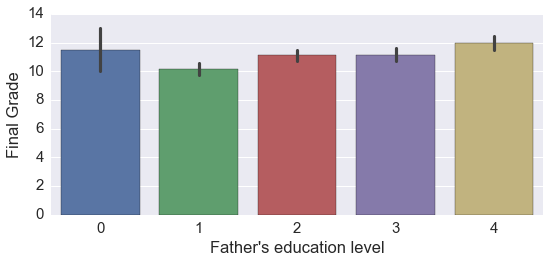

In [385]:
plot2 = sns.factorplot(x="MothersEducation", y="FinalGrades", data=students, kind="bar", aspect=2);
plot2.set(ylabel="Final Grade", xlabel="Mother's education level");

plot2 = sns.factorplot(x="FathersEducation", y="FinalGrades", data=students, kind="bar", aspect =2);
plot2.set(ylabel="Final Grade", xlabel="Father's education level");

- <b>Girls study more than boys even after drinking the same amount of alcohol .However the box diagram shows that the average grades is almost the same for boys and girls</b> 

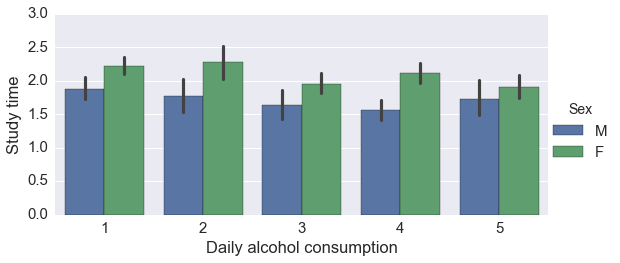

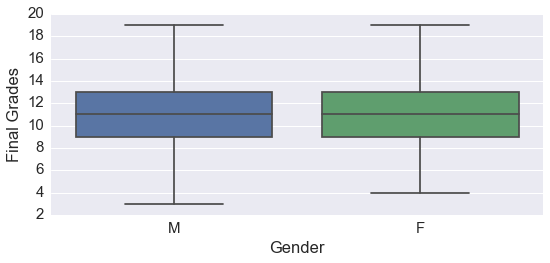

In [389]:
plot2 = sns.factorplot(x="WeekdayAlcohol", y="Studytime", data=students, hue = "Sex", kind="bar", aspect =2);
plot2.set(ylabel="Study time", xlabel="Daily alcohol consumption");

plot2 = sns.factorplot(x="Sex", y="FinalGrades", data=students,kind="box", aspect =2);
plot2.set(ylabel="Final Grades", xlabel="Gender");

# Thank you. This is the end of my python project. 

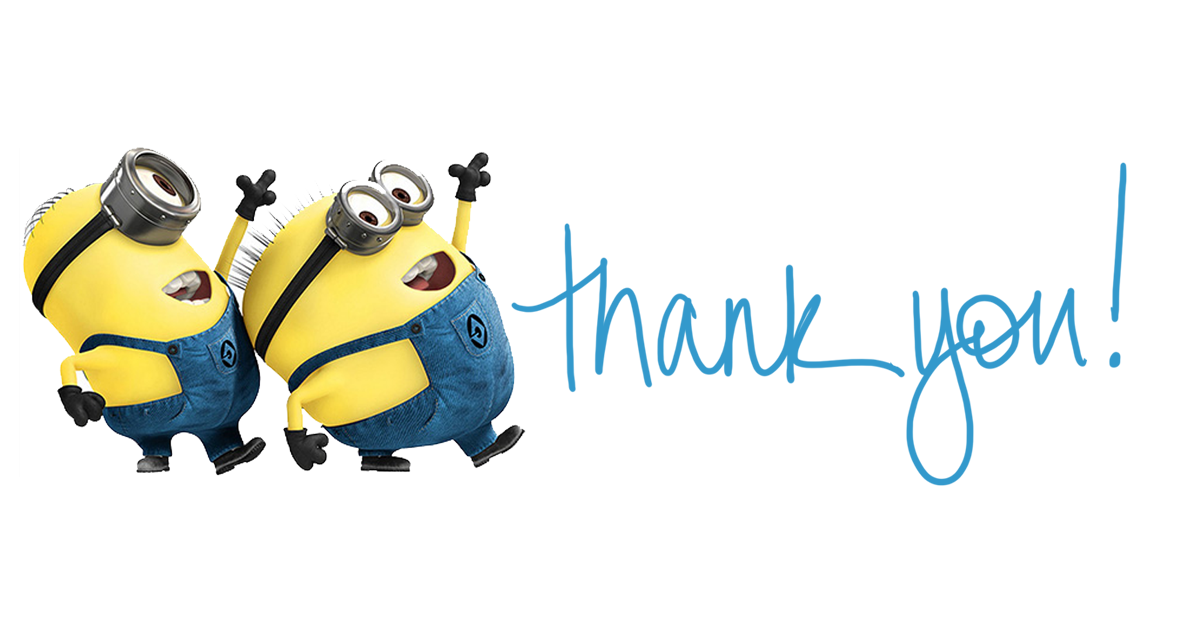

In [390]:
Image(filename='C:\MSIS-Data science with Python\Lectures and python files\Final-Project-Important\Data\\thankyou.png')